In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import string
import csv

etiquetas = ["libro1", 
             "libro2", 
             "libro3", 
             "libro4", 
             "libro5",
             "libro6"]
corpus = []

def remove_words(text, words):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text_words = text.split(',')
    text_words = [w for w in text_words if w not in words]
    text = ' '.join(text_words)
    return text

if __name__ == "__main__":
    directorio_actual = os.getcwd()
    #os.chdir(f'{directorio_actual}/data')
    with open('stopwords.txt', 'r') as f:
        stopwords = f.read().split()
    for etiqueta in etiquetas:
        archivo = open(etiqueta + ".txt", "r", encoding="utf-8")
        libro = archivo.read()
        archivo.close()
        libro_filtrado = remove_words(libro.lower(), stopwords)
        corpus.append(libro_filtrado)
        with open(f"""{etiqueta}.csv""", 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(libro_filtrado.split())  # Divide el texto filtrado en palabras utilizando la coma como delimitador


    corpus = np.array(corpus)
    df_corpus = pd.DataFrame({"documento": corpus, 
                            "categoria": etiquetas})
    todas_las_palabras = set(" ".join(df_corpus["documento"]).split())
    todas_las_palabras = list(todas_las_palabras)
    with open('palabras.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(todas_las_palabras) 

Los resultados son diferentes.


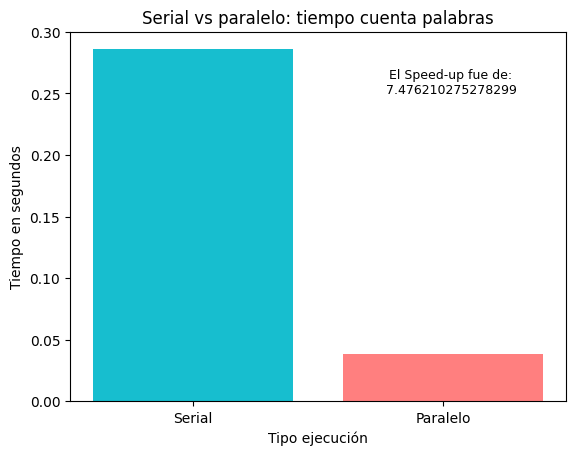

In [7]:
import sys
import os
import matplotlib.pyplot as plt

def procesar_archivo(nombre_archivo):
    with open(nombre_archivo, 'r') as archivo:
        primera_linea = archivo.readline()
        numero = float(primera_linea.strip())
    return numero

if __name__ == "__main__":
    os.chdir(f'{directorio_actual}/data')
    
    # Carga los resultados CSV en DataFrames de pandas
    df1 = pd.read_csv("resultados_paralelo.csv")
    df2 = pd.read_csv("resultados_serial.csv")
    iguales = df1.equals(df2)
    if iguales:
        print("Los resultados son iguales.")
    else:
        print("Los resultados son diferentes.")
    
    # Graficamos
    # Graficamos
    nombre_archivo_serial = 'tiempo_serial.csv'
    nombre_archivo_paralelo = 'tiempo_paralelo.csv'
    resultado_serial = procesar_archivo(nombre_archivo_serial)
    resultado_paralelo = procesar_archivo(nombre_archivo_paralelo)
    valores = [resultado_serial, resultado_paralelo]
    nombres = ['Serial', 'Paralelo']
    fig, ax = plt.subplots()
    ax.bar(nombres, valores, color=['#17becf', '#ff7f7f'])
    ax.text(0.9, 0.9, "El Speed-up fue de: \n"+str(resultado_serial/resultado_paralelo),
             fontsize=9,transform=ax.transAxes,horizontalalignment='right', verticalalignment='top')
    ax.set_title('Serial vs paralelo: tiempo cuenta palabras')
    ax.set_xlabel('Tipo ejecución')
    ax.set_ylabel('Tiempo en segundos')
    # mostrar el gráfico
    plt.show()


In [10]:
import pandas as pd

# lee el archivo CSV y guarda los datos en un DataFrame
dataframe = pd.read_csv('resultados_paralelo.csv')

# muestra los primeros 5 registros del DataFrame
print(dataframe.head())


   enjoyable  platforme  diem  apoth  grinding  linstock  regulation   
0          0          0     0      0         0         0           0  \
1          1          0     0      0         1         1           0   
2          0          0     1      0         0         0           3   
3          0          2     0      0         0         0           0   
4          0          0     0      4         0         0           0   

   unimpaire  sundry  barbarous  ...  worse  midnight  troth  boat  lure  hee   
0          0       0          0  ...      1         1      0     1     0    0  \
1          0       2          4  ...      4         7      0     4     1    0   
2          1       6          0  ...      7         8      0     2     0    0   
3          0       0          0  ...      0         3      0     0     0   21   
4          0       0          0  ...      0         1      2     0     1    0   

   deduct  porpentine  charmingly  cramp  
0       0           0           0    

In [11]:
# selección de columnas utilizando loc[]
df_filtrado = dataframe.loc[:, ['zonaprueba', 'zonaprueba_a', 'zonaprueba_b', 'zonaprueba_c', 'zonaprueba_d', 'zonaprueba_e', 'zonaprueba_f']]

In [12]:
df_filtrado

,zonaprueba,zonaprueba_a,zonaprueba_b,zonaprueba_c,zonaprueba_d,zonaprueba_e,zonaprueba_f
0,1,1,0,0,0,0,0
1,2,0,1,0,0,0,0
2,3,0,0,1,0,0,0
3,4,0,0,0,1,0,0
4,5,0,0,0,0,1,0
5,6,0,0,0,0,0,1


: 